In [183]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
f = 100  # Hz
fs = 10000  # Hz
t_i = 0.0  # s
t_f = 0.5  # s

In [185]:
Ts = 1/fs
n_i = int(t_i // Ts)
n_f = int(t_f // Ts)
time = np.array([n*Ts for n in range(0, n_f)])
signal = np.sin(2*np.pi*f*time)

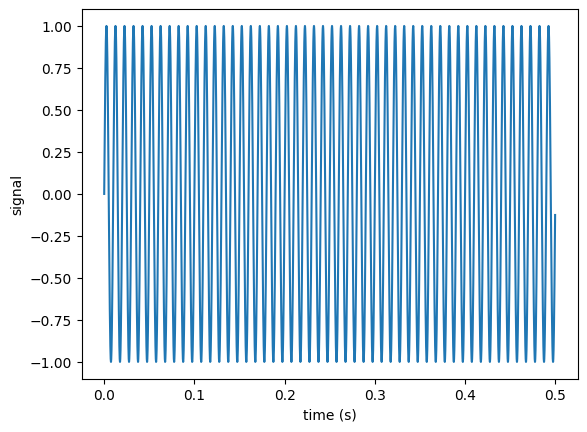

In [186]:
def plot_signal(time, signal):
    fig, ax = plt.subplots(1,1)
    ax.plot(time, signal)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('signal')

plot_signal(time, signal)

1.4111523837438156
1.4020108666016227


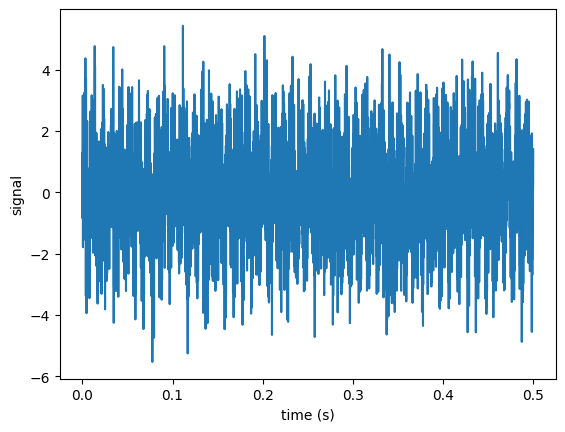

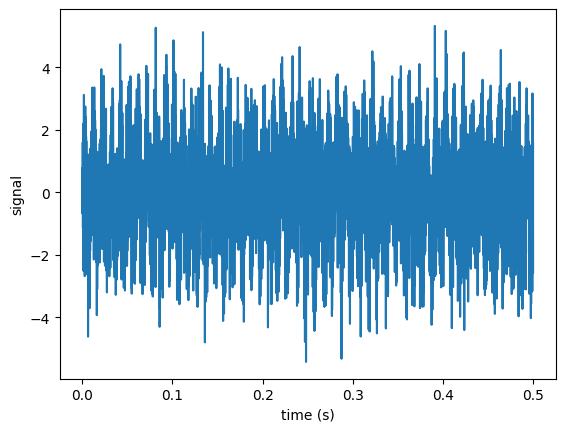

In [187]:
SNR = -6

def calc_snr(signal, noise):
    return 10*np.log10(np.var(signal)/np.var(noise))


def calc_rms(y):
    return np.sqrt(np.mean(y**2))


def my_awgn(signal, snr):
    N = len(signal)
    noise_n = np.random.randn(N)
    noise_n_var = np.var(noise_n)
    # print(np.sqrt(np.sum((noise_n-np.mean(noise_n))**2)/(N)))
    # print(np.sqrt(noise_var))

    signal_var = np.var(signal)
    # snr = 10*np.log10(np.var(signal)/np.var(noise))
    noise_var = signal_var / (10 ** (snr/10))
    noise = noise_n * np.sqrt(noise_var / noise_n_var)
    # print(calc_snr(signal, noise))
    return signal + noise


def add_white_noise(signal, snr_db):
    """
    Generado por bing chat (chatGPT) ---- DANGER !!!
    Add white noise to a signal with a specific SNR in dB
    """
    # Calculate signal power
    sig_power = np.sum(signal ** 2) / len(signal)

    # Calculate noise power
    noise_power = sig_power / (10 ** (snr_db / 10))
    
    # Generate white noise
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    
    # Add noise to signal
    noisy_signal = signal + noise
    
    return noisy_signal


signal_n = my_awgn(signal, SNR)
plot_signal(time, signal_n)
print(calc_rms(signal_n-signal))

signal_n = add_white_noise(signal, SNR)
plot_signal(time, signal_n)
print(calc_rms(signal_n-signal))

In [188]:
from scipy.fftpack import fft

def plot_fft(t, y, title='', ax=None, phase_flag=False, logscale=False):
    T = t[1] - t[0]
    N = len(t)
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    if ax is None:
        fig, ax = plt.subplots()
    if phase_flag is False:
        ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    else:
        ax.plot(xf, 2.0/N * np.angle(yf[:N//2]))
    ax.set_title(title)
    if ax is None:
        plt.show()
    if logscale:
        ax.set_yscale('log')
    return ax



<Axes: >

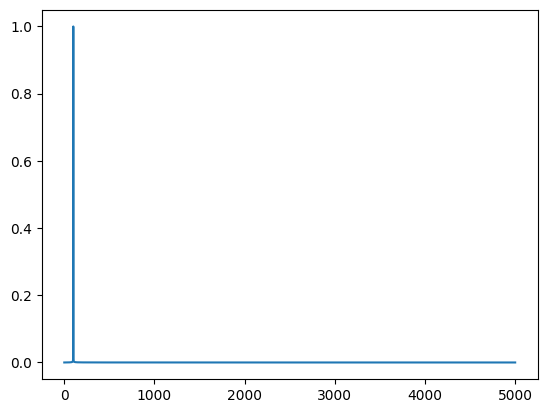

In [189]:
plot_fft(time, signal)

# Sampling noisy signal without antia-liasing filter

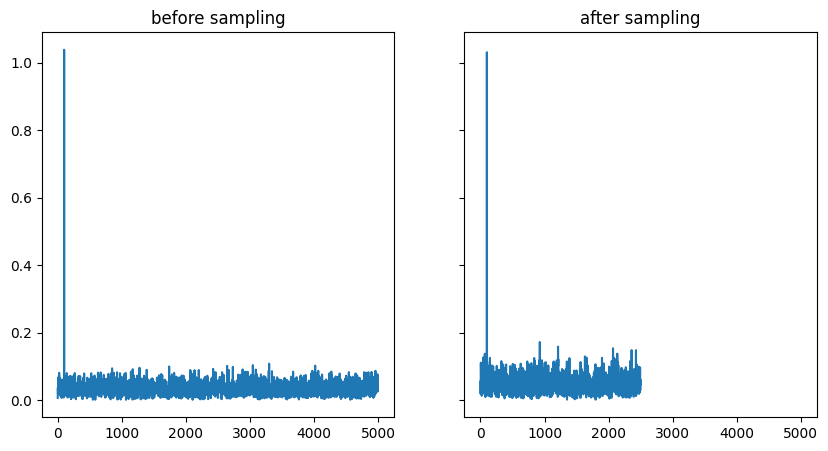

In [190]:
sampling_frequency = 5000

decimation = fs//sampling_frequency
signal_n_sampled, time_sampled = signal_n[0::decimation], time[0::decimation]

fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex='row', sharey='row')
plot_fft(time, signal_n, title='before sampling', ax=axs[0])
plot_fft(time_sampled, signal_n_sampled, title='after sampling', ax=axs[1])
plt.show()

# Sampling noisy signal with antia-liasing filter

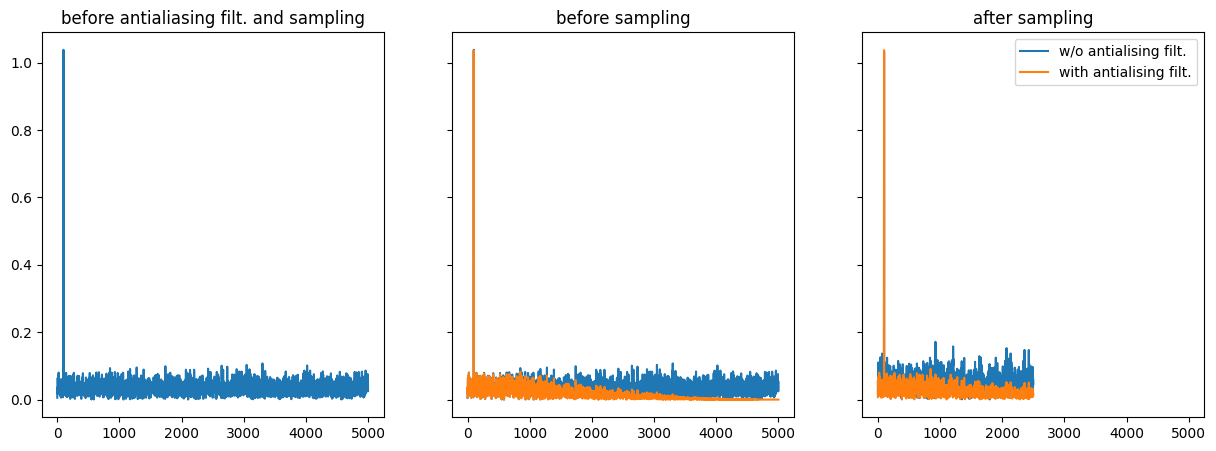

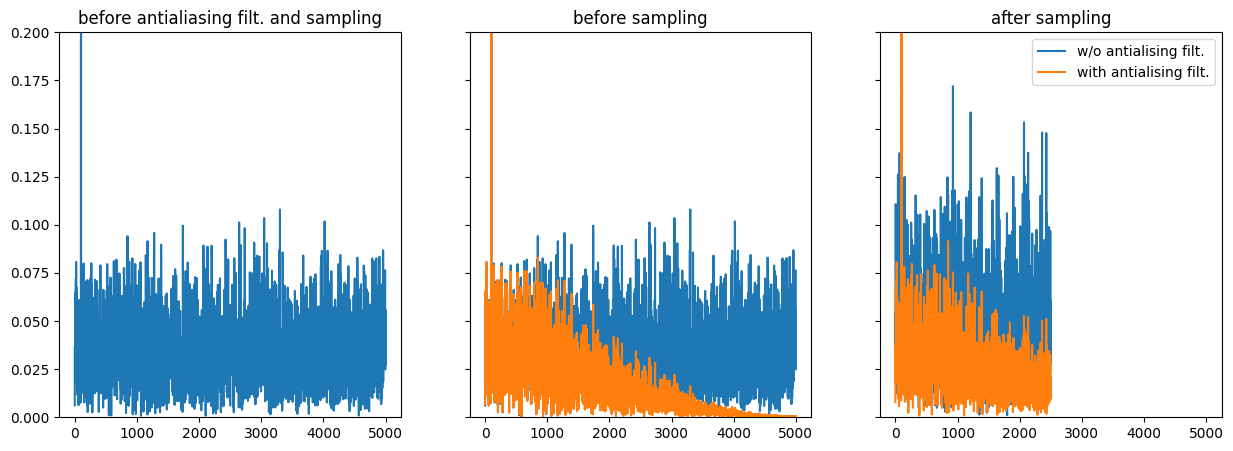

In [191]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte del filtro
fc = 2000  # Hz
# Orden del filtro
order = 1
# Crear el filtro
b, a = butter(order, fc / (fs / 2), btype='lowpass')
signal_n_filt = filtfilt(b, a, signal_n)

signal_n_filt_sampled, time_sampled = signal_n_filt[0::decimation], time[0::decimation]

fig, axs = plt.subplots(1, 3, figsize=(15,5), sharex='row', sharey='row')
plot_fft(time, signal_n, title='before antialiasing filt. and sampling', ax=axs[0])
plot_fft(time, signal_n, title='before sampling', ax=axs[1])
plot_fft(time, signal_n_filt, title='before sampling', ax=axs[1])
plot_fft(time_sampled, signal_n_sampled, title='after sampling', ax=axs[2])
plot_fft(time_sampled, signal_n_filt_sampled, title='after sampling', ax=axs[2])
axs[2].legend(['w/o antialising filt.', 'with antialising filt.'])
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(15,5), sharex='row', sharey='row')
plot_fft(time, signal_n, title='before antialiasing filt. and sampling', ax=axs[0])
plot_fft(time, signal_n, title='before sampling', ax=axs[1])
plot_fft(time, signal_n_filt, title='before sampling', ax=axs[1])
plot_fft(time_sampled, signal_n_sampled, title='after sampling', ax=axs[2])
plot_fft(time_sampled, signal_n_filt_sampled, title='after sampling', ax=axs[2])
axs[2].legend(['w/o antialising filt.', 'with antialising filt.'])
[axs[i].set_ylim((0,.2)) for i in [0,1,2]]
plt.show()
